# Time Series - IV (ARMA Models)

We have seen how Auroregressive (AR) and Moving average (MA) models explains the autocorrelation in data and we have also seen that not all of it can be explained by any one simple model. ARMA models or Autoregressive Moving average models are the combination of AR and MA models.

ARMA(p,z) is a combination of an AR model of order p and a MA model of order q. In the combination:
-  AR(p) model explains the momentum and the mean reversal effect of the market.
-  MA(q) model explains the shock effects observed.

ARMA(1,1) model looks like this:
\begin{align}
x_{t} = \alpha * x_{t-1} + \beta * e_{t-1} + e_{t}
\end{align}

where e(t) is white noise with mean = 0

In [2]:
# importing the necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Defining a function to visualize and analyze the time series 

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    '''
    Prepares a (3,2) dimensional plot for the visualization of time series values, autocorrelation and partial 
    autocorrelation plots and QQ and probability plots for comparision with normal distribution.
    
    Args:
    y: time series values
    lags: How many lagging values are to be considered.
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

**Simulating an ARMA(2,2) model with alphas = [0.5, -0.25] and betas = [0.5, -0.3] **

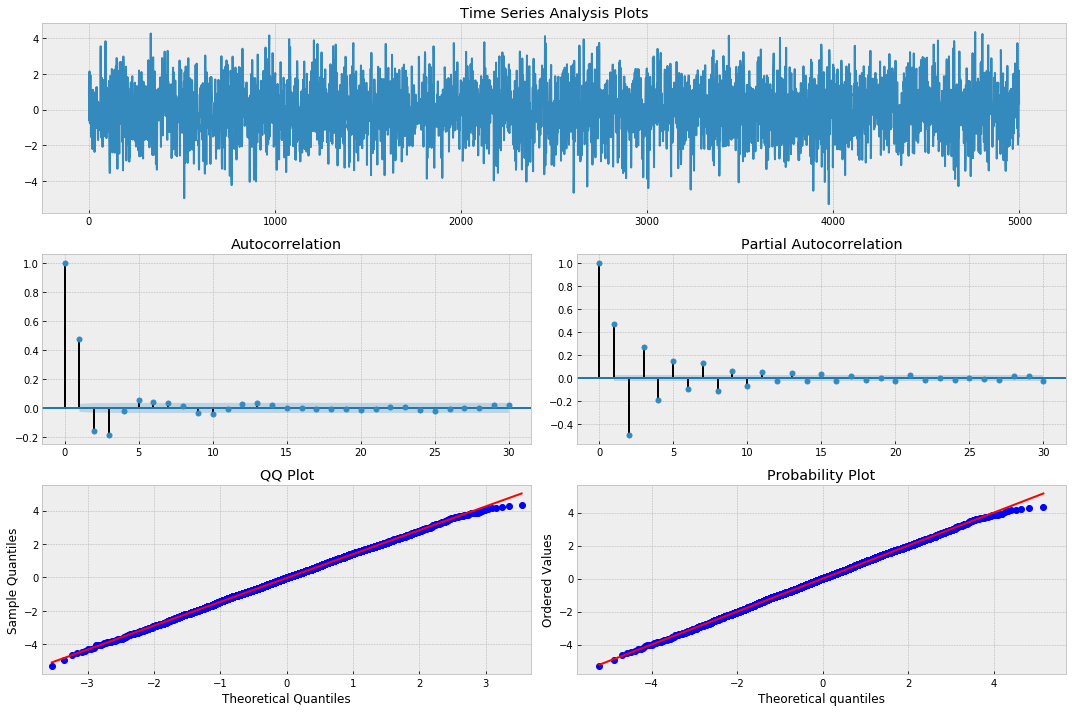

In [8]:
max_lag = 30
n = int(5000)
burn = int(n/10) #no of samples to disgard before fit

alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n, burnin = burn)
_ = tsplot(arma22, lags = max_lag)

Now that we have our ARMA(2,2) data, we will fit a model on this and see how well is our model able to estimate the alphas and betas.

In [14]:
model = smt.ARMA(arma22, order = (2,2)).fit( maxlag = max_lag,
                                           method = 'mle',
                                           trend = 'nc',
                                           burnin = burn)

print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(2, 2)   Log Likelihood               -7077.307
Method:                           mle   S.D. of innovations              0.996
Date:                Sat, 23 Jun 2018   AIC                          14164.614
Time:                        15:29:10   BIC                          14197.200
Sample:                             0   HQIC                         14176.035
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4242      0.054      7.890      0.000       0.319       0.530
ar.L2.y       -0.2424      0.015    -15.742      0.000      -0.273      -0.212
ma.L1.y        0.5605      0.055     10.272      0.0

**How do we decide the value of p and q to be choosen? **

We use AIC or Akaike Information Criteria to find the relative quality of a model on a given data. In the process, we fit multiple ARMA models  
